In [ ]:
 !pip install pulp

4. Hands-On Coding
4.1 Preprocessing
At this point, we have all that we need. Let’s import some libraries:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pulp import *
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/nutrition.csv').drop('Unnamed: 0',axis=1)
data.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [ ]:
data = data[['name','serving_size','calories','carbohydrate','total_fat','protein']]
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   serving_size  8789 non-null   object
 2   calories      8789 non-null   int64 
 3   carbohydrate  8789 non-null   object
 4   total_fat     8789 non-null   object
 5   protein       8789 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.1+ KB
None


,name,serving_size,calories,carbohydrate,total_fat,protein
0,Cornstarch,100 g,381,91.27 g,0.1g,0.26 g
1,"Nuts, pecans",100 g,691,13.86 g,72g,9.17 g
2,"Eggplant, raw",100 g,25,5.88 g,0.2g,0.98 g
3,"Teff, uncooked",100 g,367,73.13 g,2.4g,13.30 g
4,"Sherbet, orange",100 g,144,30.40 g,2g,1.10 g


<ipython-input-15-e91bbc30cb90>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot((data.serving_size),palette=['#830c4f'])


<Axes: xlabel='count', ylabel='serving_size'>

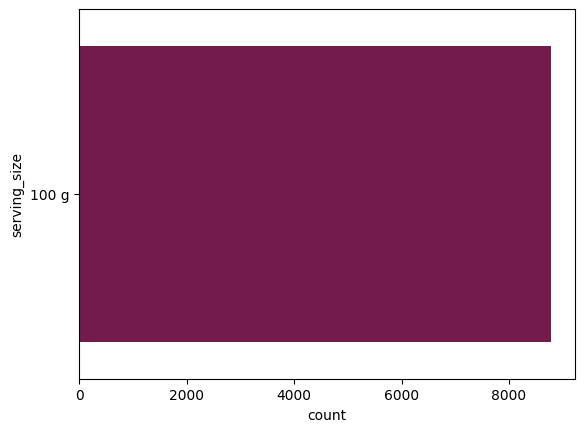

In [ ]:
sns.countplot((data.serving_size),palette=['#830c4f'])

A lot of information, probably a little too much. What we really need for our simplified experiment is the following:

serving_size
carbohydrates
total_fat
calories
protein

Great. Let’s move on. First of all, all the serving_size look to be 100g. If that is the case, we don’t need that column at all. Let’s check it out:

In [ ]:
data = data.drop('serving_size',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   calories      8789 non-null   int64 
 2   carbohydrate  8789 non-null   object
 3   total_fat     8789 non-null   object
 4   protein       8789 non-null   object
dtypes: int64(1), object(4)
memory usage: 343.4+ KB


In [ ]:
data['carbohydrate'] = np.array([data['carbohydrate'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['protein'] = np.array([data['protein'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['total_fat'] = np.array([data['total_fat'].tolist()[i].split('g') for i in range(len(data))])[:,0].astype('float')

Yep. Super-useless column. Let’s get rid of it

Now an important step of the diet is to be variegate*. We’ll reach this goal by allowing our model to look at only specific random portions of the dataset instead of the whole dataset. That’s how we’ll do it:

In [ ]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
split_values = np.linspace(0,len(data),8).astype(int)
split_values[-1] = split_values[-1]-1
def random_dataset():
    frac_data = data.sample(frac=1).reset_index().drop('index',axis=1)
    day_data = []
    for s in range(len(split_values)-1):
        day_data.append(frac_data.loc[split_values[s]:split_values[s+1]])
    return dict(zip(week_days,day_data))

Now we need to change the carbohydrate, protein, and total_fat columns into float number columns:

In [ ]:
random_dataset()['Monday']

,name,calories,carbohydrate,total_fat,protein
0,"Beverages, Diet Cran Cherry, OCEAN SPRAY",4,0.70,0.0,0.21
1,"Cereals ready-to-eat, chocolate-flavored frost...",405,87.20,3.5,3.34
2,"Tofu, prepared with calcium sulfate, regular, raw",76,1.87,4.8,8.08
3,"Yautia (tannier), raw",98,23.63,0.4,1.46
4,"McDONALD'S, Premium Crispy Chicken Classic San...",228,25.46,8.7,12.08
...,...,...,...,...,...
1251,"Beef, grilled, cooked, select, trimmed to 0"" f...",154,0.00,4.0,29.47
1252,"Snacks, reduced fat, nacho-flavor, tortilla chips",445,71.60,15.0,8.70
1253,"Chicken, roasted, cooked, meat only, roasting",167,0.00,6.6,25.01
1254,"Cereals ready-to-eat, CHOCOLATE LUCKY CHARMS, ...",381,84.40,4.4,5.59


<ipython-input-20-ff9230190a4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Carbohydrates','Fat','Protein'], y=data.sum()[2:], palette=['#ec8bc7', '#e2c9b0', '#830c4f'])


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0.0, '0'),
  Text(0, 25000.0, '25000'),
  Text(0, 50000.0, '50000'),
  Text(0, 75000.0, '75000'),
  Text(0, 100000.0, '100000'),
  Text(0, 125000.0, '125000'),
  Text(0, 150000.0, '150000'),
  Text(0, 175000.0, '175000'),
  Text(0, 200000.0, '200000'),
  Text(0, 225000.0, '225000')])

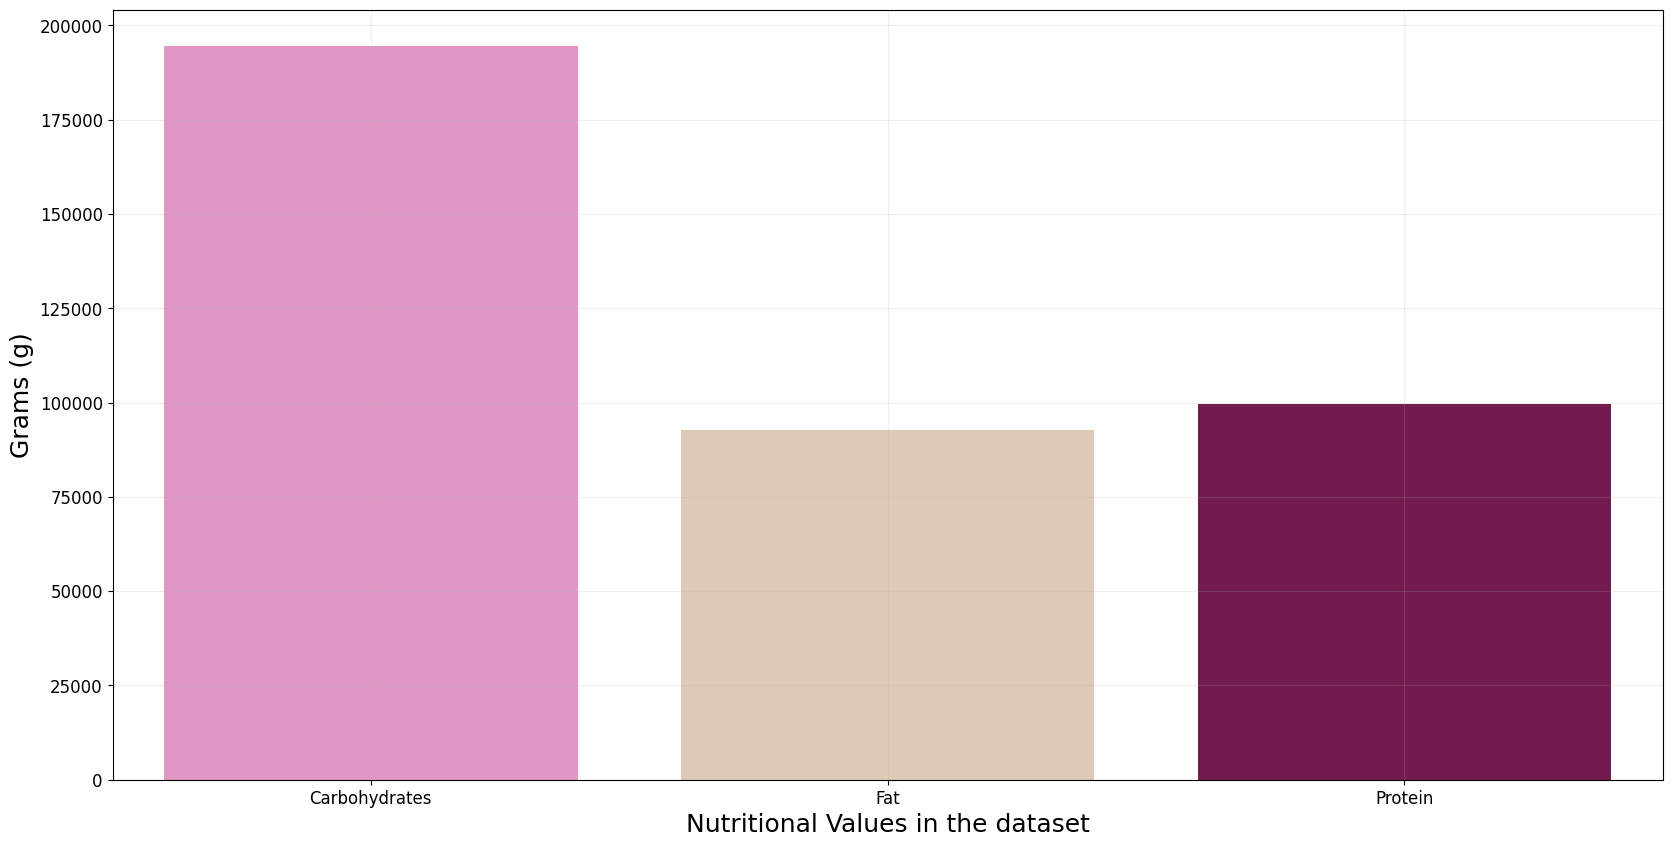

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=['Carbohydrates','Fat','Protein'], y=data.sum()[2:], palette=['#ec8bc7', '#e2c9b0', '#830c4f'])
plt.grid(alpha=0.2)
plt.xlabel('Nutritional Values in the dataset',fontsize=18)
plt.ylabel('Grams (g)',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

*Note: It is very easy to imagine that this step can be improved if we don’t consider random splits but if we try and build this “day datasets” with a specific criterion. It is also necessary to have some kind of domain knowledge to implement this criterion, which I do not have because I am not a dietician.

In chapter 1 we were discussing about the number of grams of food and calories that a person should eat. In order to compute these (indicative) values, we can use the following two functions:


In [ ]:
def build_nutritional_values(kg,calories):
    protein_calories = kg*4
    res_calories = calories-protein_calories
    carb_calories = calories/2.
    fat_calories = calories-carb_calories-protein_calories
    res = {'Protein Calories':protein_calories,'Carbohydrates Calories':carb_calories,'Fat Calories':fat_calories}
    return res

In [ ]:
def extract_gram(table):
    protein_grams = table['Protein Calories']/4.
    carbs_grams = table['Carbohydrates Calories']/4.
    fat_grams = table['Fat Calories']/9.
    res = {'Protein Grams':protein_grams, 'Carbohydrates Grams':carbs_grams,'Fat Grams':fat_grams}
    return res

So let’s say that our weight is 70 kg and we need to eat 2000 calories per day. We will need to eat:

In [ ]:
build_nutritional_values(70,2000)

{'Protein Calories': 280,
 'Carbohydrates Calories': 1000.0,
 'Fat Calories': 720.0}

In [ ]:
list(extract_gram(build_nutritional_values(70,1500)).values())
#list(extract_gram(build_nutritional_values(70,1500)).keys())

[70.0, 187.5, 52.22222222222222]

In terms of grams, this means:

In [ ]:
print(extract_gram(build_nutritional_values(70,2000)))

{'Protein Grams': 70.0, 'Carbohydrates Grams': 250.0, 'Fat Grams': 80.0}


<ipython-input-26-e53ace295091>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(perfect_proportion.keys()), y=list(perfect_proportion.values()),palette=['#ec8bc7', '#e2c9b0', '#830c4f'])


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200')])

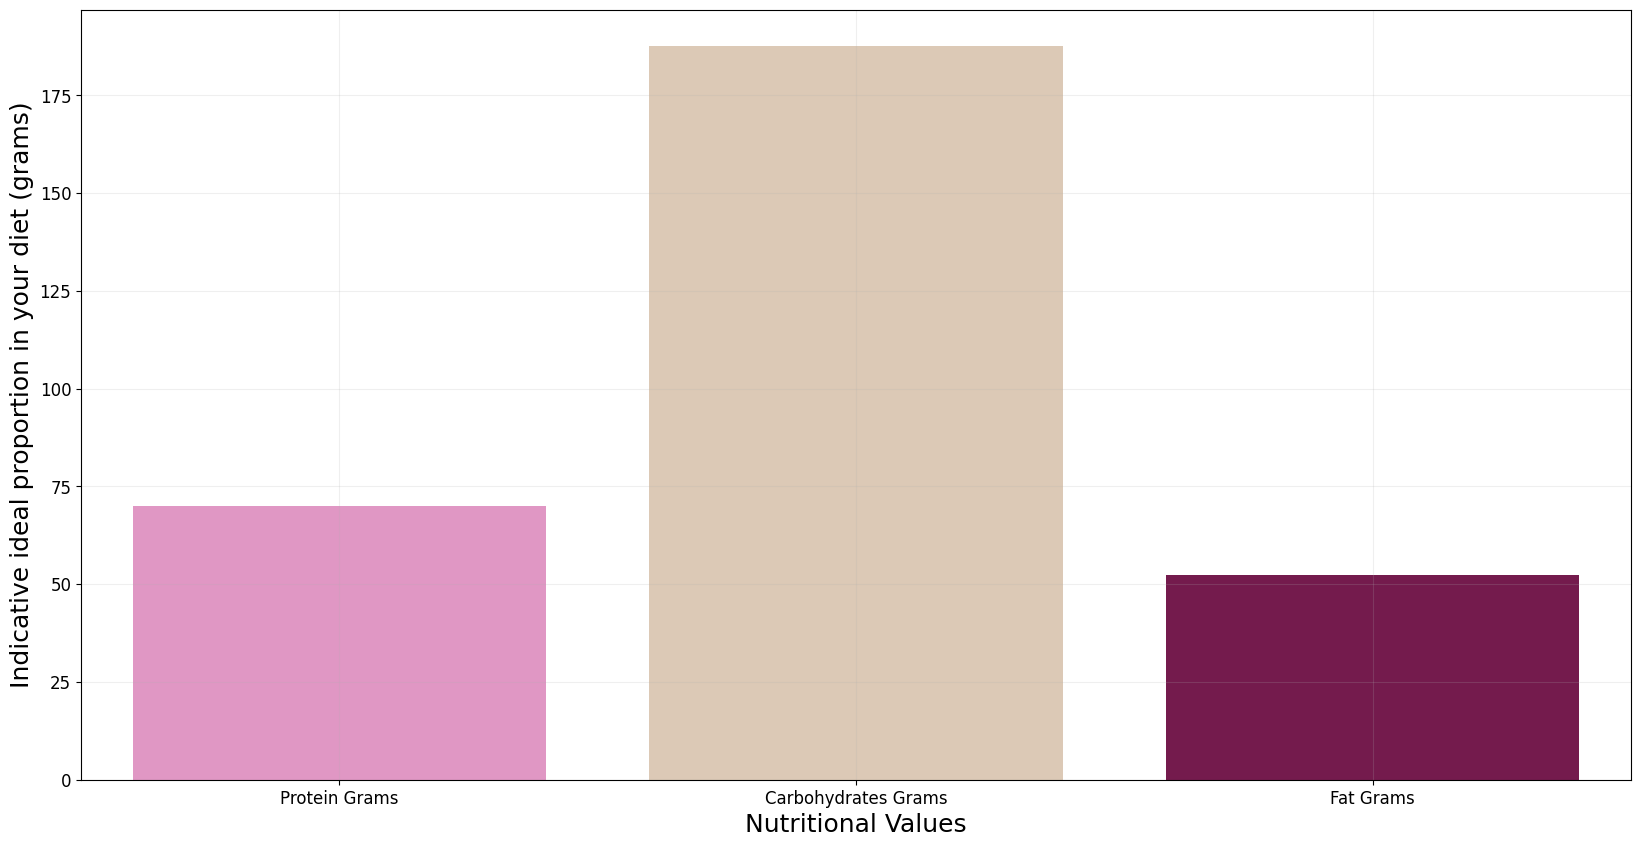

In [ ]:
# Calculate the perfect proportion once
perfect_proportion = extract_gram(build_nutritional_values(70, 1500))
plt.figure(figsize=(20, 10))
sns.barplot(x=list(perfect_proportion.keys()), y=list(perfect_proportion.values()),palette=['#ec8bc7', '#e2c9b0', '#830c4f'])
plt.grid(alpha=0.2)
plt.xlabel('Nutritional Values', fontsize=18)
plt.ylabel('Indicative ideal proportion in your diet (grams)', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
print(build_nutritional_values(70,1500))
print(extract_gram(build_nutritional_values(70,1500)))

{'Protein Calories': 280, 'Carbohydrates Calories': 750.0, 'Fat Calories': 470.0}
{'Protein Grams': 70.0, 'Carbohydrates Grams': 187.5, 'Fat Grams': 52.22222222222222}


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

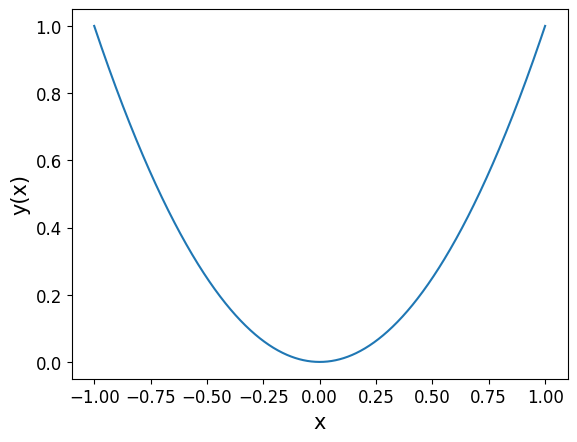

In [ ]:
x = np.linspace(-1,1,1000)
plt.plot(x,x**2)
plt.xlabel('x',fontsize=15)
plt.ylabel('y(x)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

4.2 Optimization
Everything we said and discussed can be implemented and summarized int the following lines of code:

In [ ]:
days_data = random_dataset()
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    return sol

In [ ]:
#sol_monday = model

In [ ]:
sol_monday = model('Monday',70,1500)

In [ ]:
sol_monday = sol_monday[sol_monday['Quantity']!=0.0]
sol_monday.Quantity = sol_monday.Quantity*100
sol_monday = sol_monday.rename(columns={'Quantity':'Quantity (g)'})
sol_monday

<ipython-input-31-493a6d536579>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sol_monday.Quantity = sol_monday.Quantity*100


,Food,Quantity (g)
746,"Collards, without salt, drained, boiled, cooked",150.0
751,"Rice noodles, dry",139.0
837,"RUDI'S, Original Sandwich Bread, Gluten-Free B...",150.0
853,"Babyfood, strained, turkey, meat",33.0
1070,"Alcoholic beverage, white, table, wine",67.0
1155,"Ham, not canned, chopped",150.0


In [ ]:
def model(prob,day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
#    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity*100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol
def total_model(kg,calories):
    result = []
    for day in week_days:
        prob  = pulp.LpProblem( "Diet", LpMinimize )
        print('Building a model for day %s \n'%(day))
        result.append(model(prob,day,kg,calories))
    return dict(zip(week_days,result))

In [ ]:
diet = total_model(70,3000)

Building a model for day Monday 

Building a model for day Tuesday 

Building a model for day Wednesday 

Building a model for day Thursday 

Building a model for day Friday 

Building a model for day Saturday 

Building a model for day Sunday 



In [ ]:
diet

{'Monday':                                                    Food  Quantity (g)
 239   Beef, braised, cooked, choice, trimmed to 1/8"...         150.0
 410   Candies, HERSHEY'S MILK CHOCOLATE WITH ALMOND ...         143.0
 746     Collards, without salt, drained, boiled, cooked         150.0
 751                                   Rice noodles, dry         150.0
 837   RUDI'S, Original Sandwich Bread, Gluten-Free B...         150.0
 853                    Babyfood, strained, turkey, meat          97.0
 1138  PIZZA HUT 14" Sausage Pizza, THIN 'N CRISPY Crust          12.0
 1140                               Pumpkin flowers, raw         150.0
 1155                           Ham, not canned, chopped         150.0,
 'Tuesday':                                                    Food  Quantity (g)
 363                    Bison, cooked, grass-fed, ground         150.0
 387   Beef, broiled, cooked, prime, trimmed to 1/8" ...         150.0
 401           Ground turkey, broiled, patties, fat fre

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pulp import *
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/nutrition.csv').drop('Unnamed: 0',axis=1)
data.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [ ]:
data = data[['name','serving_size','calories','carbohydrate','total_fat','protein']]
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   serving_size  8789 non-null   object
 2   calories      8789 non-null   int64 
 3   carbohydrate  8789 non-null   object
 4   total_fat     8789 non-null   object
 5   protein       8789 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.1+ KB
None


,name,serving_size,calories,carbohydrate,total_fat,protein
0,Cornstarch,100 g,381,91.27 g,0.1g,0.26 g
1,"Nuts, pecans",100 g,691,13.86 g,72g,9.17 g
2,"Eggplant, raw",100 g,25,5.88 g,0.2g,0.98 g
3,"Teff, uncooked",100 g,367,73.13 g,2.4g,13.30 g
4,"Sherbet, orange",100 g,144,30.40 g,2g,1.10 g


<Axes: xlabel='count', ylabel='serving_size'>

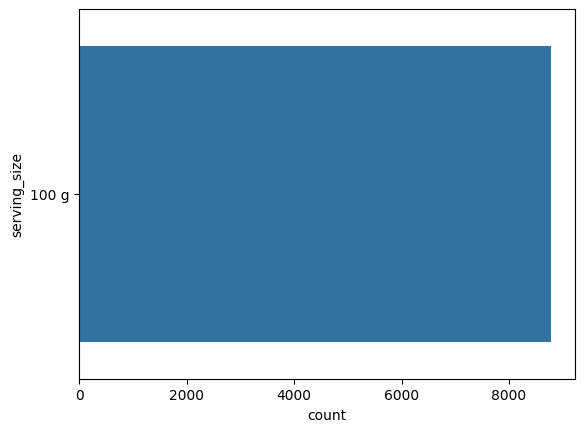

In [ ]:
sns.countplot(data.serving_size)

In [ ]:
data = data.drop('serving_size',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   calories      8789 non-null   int64 
 2   carbohydrate  8789 non-null   object
 3   total_fat     8789 non-null   object
 4   protein       8789 non-null   object
dtypes: int64(1), object(4)
memory usage: 343.4+ KB


In [ ]:
data['carbohydrate'] = np.array([data['carbohydrate'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['protein'] = np.array([data['protein'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['total_fat'] = np.array([data['total_fat'].tolist()[i].split('g') for i in range(len(data))])[:,0].astype('float')

In [ ]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
split_values_day = np.linspace(0,len(data),8).astype(int)
split_values_day[-1] = split_values_day[-1]-1
def random_dataset_day():
    frac_data = data.sample(frac=1).reset_index().drop('index',axis=1)
    day_data = []
    for s in range(len(split_values_day)-1):
        day_data.append(frac_data.loc[split_values_day[s]:split_values_day[s+1]])
    return dict(zip(week_days,day_data))

In [ ]:
meals = ['Snack 1','Snack 2','Breakfast','Lunch','Dinner']
split_values_meal = np.linspace(0,split_values_day[1],len(meals)+1).astype(int)
split_values_meal[-1] = split_values_meal[-1]-1
def random_dataset_meal(data_day):
    frac_data = data_day.sample(frac=1).reset_index().drop('index',axis=1)
    meal_data = []
    for s in range(len(split_values_meal)-1):
        meal_data.append(frac_data.loc[split_values_meal[s]:split_values_meal[s+1]])
    return dict(zip(meals,meal_data))

In [ ]:
random_dataset_meal(random_dataset_day()['Monday'])

{'Snack 1':                                                   name  calories  \
 0                              Spaghetti, dry, spinach       372   
 1         Syrups, with 2% maple, pancake, table blends       265   
 2      Cauliflower, with salt, drained, boiled, cooked        23   
 3    Pork, crumbles, cooked, 84% lean / 16% fat, gr...       289   
 4           Soup, condensed, canned, chicken vegetable        61   
 ..                                                 ...       ...   
 247     Cereals ready-to-eat, Honey KIX, GENERAL MILLS       364   
 248  Chicken, braised, cooked, skin (drumsticks and...       443   
 249   Okra, with salt, drained, boiled, cooked, frozen        34   
 250  Beef, raw, choice, trimmed to 1/8" fat, separa...       148   
 251  Beverages, prepared with water, regular, insta...         2   
 
      carbohydrate  total_fat  protein  
 0           74.81        1.6    13.35  
 1           69.60        0.1     0.00  
 2            4.11        0.5     1.

In [ ]:
def build_nutritional_values(kg,calories):
    protein_calories = kg*4
    res_calories = calories-protein_calories
    carb_calories = calories/2.
    fat_calories = calories-carb_calories-protein_calories
    res = {'Protein Calories':protein_calories,'Carbohydrates Calories':carb_calories,'Fat Calories':fat_calories}
    return res

In [ ]:
build_nutritional_values(70,2000)

{'Protein Calories': 280,
 'Carbohydrates Calories': 1000.0,
 'Fat Calories': 720.0}

In [ ]:
print(extract_gram(build_nutritional_values(70,2000)))

{'Protein Grams': 70.0, 'Carbohydrates Grams': 250.0, 'Fat Grams': 80.0}


In [ ]:
days_data = random_dataset_day()
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity/100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol

In [ ]:
def model(prob, kg,calories,meal,data):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = data
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
#    prob  = pulp.LpProblem( "Diet", LpMinimize )
    div_meal = meal_split[meal]
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E*div_meal
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F*div_meal
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P*div_meal
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity*100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol
def total_model(kg,calories):
    result = []
    for day in week_days:
        prob  = pulp.LpProblem( "Diet", LpMinimize )
        print('Building a model for day %s \n'%(day))
        result.append(model(prob,day,kg,calories))
    return dict(zip(week_days,result))

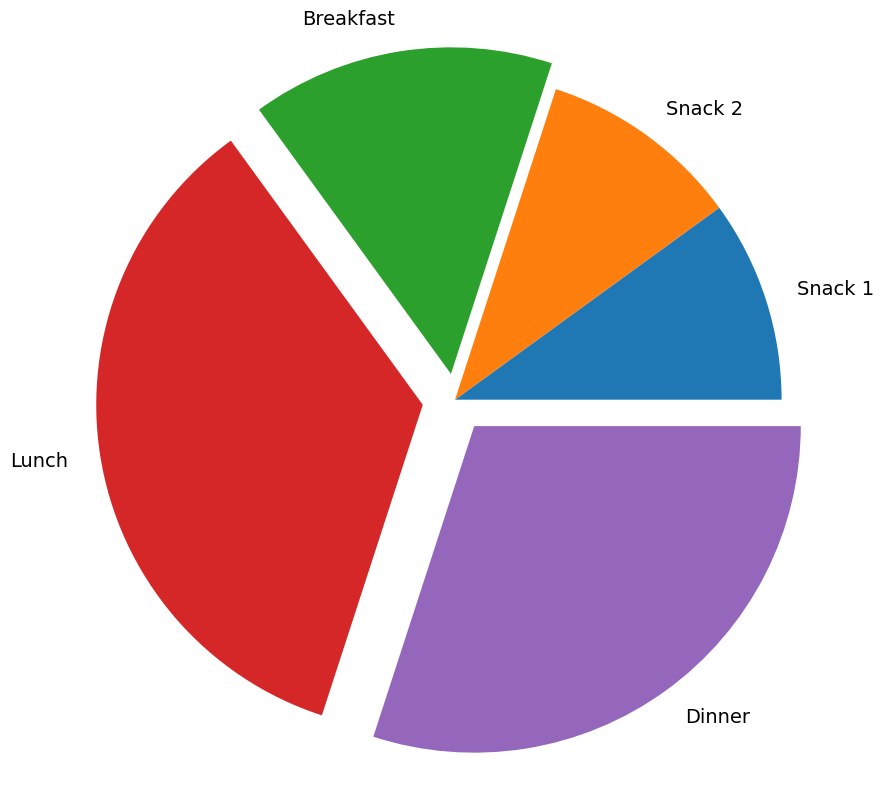

In [ ]:
meal_split = {'Snack 1': 0.10, 'Snack 2':0.10,'Breakfast': 0.15,'Lunch':0.35, 'Dinner':0.30}
labels = []
sizes = []

for x, y in meal_split.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels,explode = [0.,0.,0.08,0.1,0.1],textprops={'fontsize': 14})

plt.axis('equal')
plt.show()

In [ ]:
from pulp import LpProblem, LpMinimize

In [ ]:
def better_model(kg,calories):
    days_data = random_dataset_day()
    res_model = []
    for day in week_days:
        day_data = days_data[day]
        meals_data = random_dataset_meal(day_data)
        meal_model = []
        for meal in meals:
            meal_data = meals_data[meal]
            prob  = pulp.LpProblem( "Diet", pulp.LpMinimize )
            model_res = model(prob, kg, calories, meal, meal_data)
            meal_model.append(model_res)
        res_model.append(meal_model)
    unpacked = []
    for i in range(len(res_model)):
        unpacked.append(dict(zip(meals,model_res[i])))
    unpacked_tot = dict(zip(week_days,unpacked))
    return unpacked_tot

In [ ]:
from pulp import LpProblem, LpMinimize

# Create a new minimization problem
problem = LpProblem("Minimization Problem", LpMinimize)



/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
diet['Saturday']['Lunch']

In [ ]:
diet['Monday']

,Food,Quantity (g)
239,"Beef, braised, cooked, choice, trimmed to 1/8""...",150.0
410,"Candies, HERSHEY'S MILK CHOCOLATE WITH ALMOND ...",143.0
746,"Collards, without salt, drained, boiled, cooked",150.0
751,"Rice noodles, dry",150.0
837,"RUDI'S, Original Sandwich Bread, Gluten-Free B...",150.0
853,"Babyfood, strained, turkey, meat",97.0
1138,"PIZZA HUT 14"" Sausage Pizza, THIN 'N CRISPY Crust",12.0
1140,"Pumpkin flowers, raw",150.0
1155,"Ham, not canned, chopped",150.0
